<a href="https://colab.research.google.com/github/Meguazy/project_CSD/blob/main/notebook_exploration_cleaning/graph_and_statistics_standard_scaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
%cd '/content/drive/MyDrive/Schnell_Traino_Project_CSD/NewData/NormalizedData/StandardScaler'

/content/drive/.shortcut-targets-by-id/12FAw9_zBXB7B9mcacT0QJ8gtv4AWA51n/Schnell_Traino_Project_CSD/NewData/NormalizedData/StandardScaler


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
no_guasto_df = pd.read_csv('NO_GUASTO.csv')
guasto_df = pd.read_csv('RUOTA_GUASTA.csv')

In [ ]:
no_guasto_df.info()

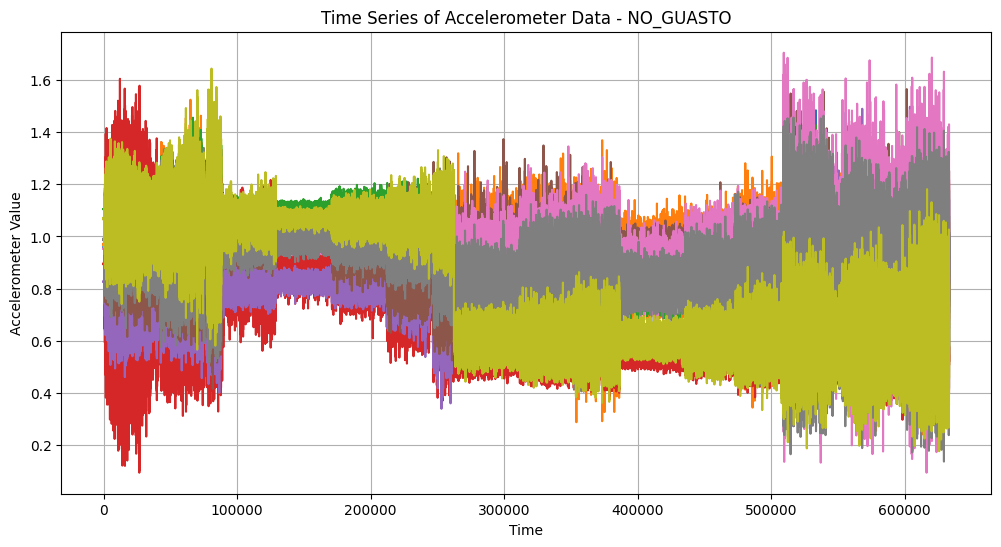

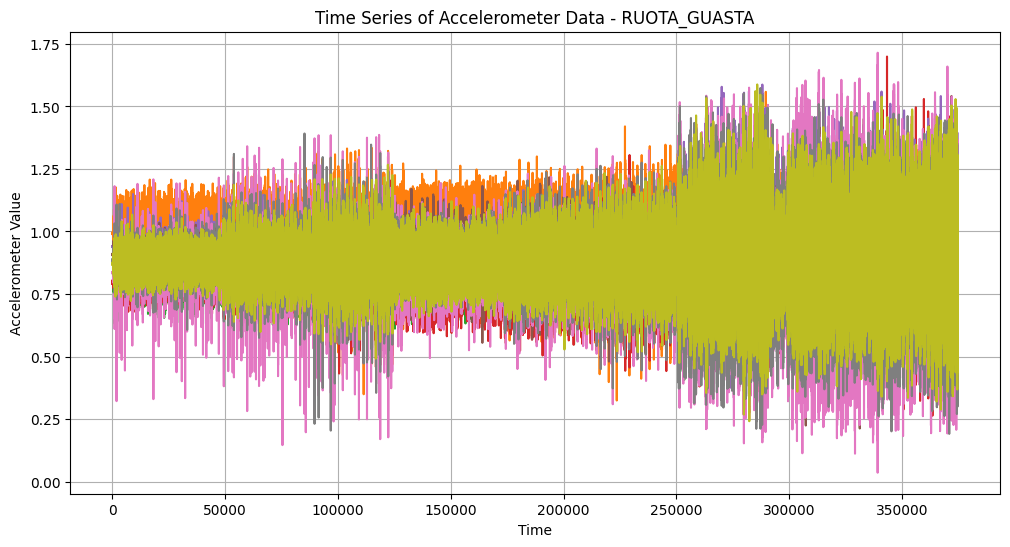

In [58]:
# Extract time and accelerometer data
time_ng = no_guasto_df['Discrete_Time']
accelerometer_data_ng = no_guasto_df.drop(columns=['Acquisition_Number', 'Discrete_Time'])
time_g = guasto_df['Discrete_Time']
accelerometer_data_g = guasto_df.drop(columns=['Acquisition_Number', 'Discrete_Time'])

# Plot time series data for NO_GUASTO.csv dataset
plt.figure(figsize=(12, 6))
for column in accelerometer_data_ng.columns:
    plt.plot(time_ng, accelerometer_data_ng[column], label=column)
plt.xlabel('Time')
plt.ylabel('Accelerometer Value')
plt.title('Time Series of Accelerometer Data - NO_GUASTO')
plt.grid(True)
plt.show()

# Plot time series data for RUOTA_GUASTA.csv dataset
plt.figure(figsize=(12, 6))
for column in accelerometer_data_g.columns:
    plt.plot(time_g, accelerometer_data_g[column], label=column)
plt.xlabel('Time')
plt.ylabel('Accelerometer Value')
plt.title('Time Series of Accelerometer Data - RUOTA_GUASTA')
plt.grid(True)
plt.show()

In [62]:
# Select only the board columns for no_guasto_df dataset
no_guasto_board_df = no_guasto_df.filter(like='Board')

# Select only the board columns for guasto_df dataset
guasto_board_df = guasto_df.filter(like='Board')

# Function to calculate average statistics for a given dataset
def calculate_average_stats(data):
    combined_stats = {}

    # Calculate statistics for each accelerometer column
    for col in data.columns:
        all_values = data[col]
        combined_stats[col] = {
            'Sum': all_values.sum(),
            'Mean': all_values.mean(),
            'Median': all_values.median(),
            'Std': all_values.std(),
            'Min': all_values.min(),
            'Max': all_values.max(),
            'Q1': all_values.quantile(0.25),
            'Q3': all_values.quantile(0.75)
        }

    # Compute the average value for each statistic across all accelerometers
    average_combined_stats = {}
    for stat in combined_stats['Board1Acc1'].keys():
        values = [stats[stat] for stats in combined_stats.values()]
        average_combined_stats[stat] = sum(values) / len(values)

    return average_combined_stats

# Calculate average statistics for no_guasto_df dataset
average_stats_no_guasto = calculate_average_stats(no_guasto_board_df)

# Calculate average statistics for guasto_df dataset
average_stats_guasto = calculate_average_stats(guasto_board_df)

# Display the average statistics for no_guasto_df dataset
print("Average Statistics for Accelerometer Data - NO_GUASTO:")
for stat, value in average_stats_no_guasto.items():
    print(f"{stat}: {value}")

# Display the average statistics for guasto_df dataset
print("\nAverage Statistics for Accelerometer Data - RUOTA_GUASTA:")
for stat, value in average_stats_guasto.items():
    print(f"{stat}: {value}")

Average Statistics for Accelerometer Data - NO_GUASTO:
Sum: 550418.8939976344
Mean: 0.8690417564613571
Median: 0.8330808380115635
Std: 0.11872098936107406
Min: 0.20855701141855543
Max: 1.556468082202964
Q1: 0.7920946012398069
Q3: 0.9693500797822023

Average Statistics for Accelerometer Data - RUOTA_GUASTA:
Sum: 329130.72852511576
Mean: 0.8785534677736736
Median: 0.879548067748871
Std: 0.07940011278601662
Min: 0.2426896914128547
Max: 1.5789706986563554
Q1: 0.8514474598664987
Q3: 0.9040216212890001
